# Capstone: Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import project utils
import sys
sys.path.append('../src')

import graph_utils


## The Data: San Francisco Police Department Incident Reports

## Read the data

The dataset is available as two CSV files with historical data from 2003-2018 and 2018-Present:

* [San Franciso Police Department Incident Reports: Historical 2003 to May 2018](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data)
* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)

The current data is updated nightly and it takes a few minutes to read and convert the data to a time-series format. So, I've created a set of utilities to optimize data ingestion in the `data_utils.py`.

In [6]:
import data_utils

I periodically refresh the dataset from the [excellent DataSF site](https://www.sf.gov/departments/city-administrator/datasf) to the project `data` directoty, and generate a _clean_ input file transformed as a time-series. I will typically do this a couple of times a week, and save the output as a static comment below so I know what happened.

**Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)**: I'm limiting the report to only the current data for now:

* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)


In [8]:
# Convert the raw SFPD data into a cleansed data file - only to be used when refreshing from new data

current_raw_file = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
current_clean_file = '../data/incidents_clean.csv'

# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER
# data_utils.generate_clean_csv(current_raw_file, current_clean_file, debug=True)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:24:59

Reading file: ../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv ... Done: 887,173 rows, 35 columns
... Formatting column names ... Done
... Creating timeseries columns: datetime and date ... 
...... Number of rows where the datetime conversion failed: 0
...... Number of rows where the date conversion failed: 0
...... Timespan: 2018-01-01 00:00:00 - 2024-09-08 19:30:00
... Done
... Setting index to datetime ... Done

Current Time: 09/13/24 16:26:17

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                                           887173 non-null  int64         
 8   incident_number                                       887173 non-null  int64         
 9   cad_number                                            689019 non-null  float64       
 10  report_type_code                                      887173 non-null  object        
 11  report_type_description                               887173 non-null  object        
 12  filed_online                                          175483 non-null  object        
 13  incident_code                                         887173 non-null  int64         
 14  incident_category                                     886295 non-null  object        
 15  incident_subcategory                                  886295 non-null  object        
 16  incident_description                                  887173 non-null  object        
 17  resolution                                            887173 non-null  object        
 18  intersection                                          838341 non-null  object        
 19  cnn                                                   838341 non-null  float64       
 20  police_district                                       887173 non-null  object        
 21  analysis_neighborhood                                 838173 non-null  object        
 22  supervisor_district                                   837885 non-null  float64       
 23  supervisor_district_2012                              838198 non-null  float64       
 24  latitude                                              838341 non-null  float64       
 25  longitude                                             838341 non-null  float64       
 26  point                                                 838341 non-null  object        
 27  neighborhoods                                         821671 non-null  float64       
 28  esncag_-_boundary_file                                9413 non-null    float64       
 29  central_market/tenderloin_boundary_polygon_-_updated  117048 non-null  float64       
 30  civic_center_harm_reduction_project_boundary          114781 non-null  float64       
 31  hsoc_zones_as_of_2018-06-05                           185157 non-null  float64       
 32  invest_in_neighborhoods_(iin)_areas                   0 non-null       float64       
 33  current_supervisor_districts                          838198 non-null  float64       
 34  current_police_districts                              837437 non-null  float64       
 35  date                                                  887173 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(5), object(16)
memory usage: 250.4+ MB
... Writing file: ../data/incidents_clean.csv (887173, 36) ... Done
Done

End Time: 09/13/24 16:26:40
```

As you can see, there are almost a million samples since 2018!

So, I then generate a few randomly sampled datasets of known percentages, to speed up the data exploration. Again only done when refreshing the dataset. Since we'll be working across multiple randomly selected datafiles, I set a global random_state value from hereon remove any randomization artifacts from one run to the next:

In [11]:
# Consistent random_state for the project
project_random_state = 42

In [12]:
# Uncomment to generate the sample files

# data_utils.generate_sample_files(current_clean_file, random_state=project_random_state)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:26:40

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Writing 10% sample file: ../data/incidents_clean_10_pct.csv (88717, 37) ... Done
... Writing 25% sample file: ../data/incidents_clean_25_pct.csv (221793, 37) ... Done
... Writing 50% sample file: ../data/incidents_clean_50_pct.csv (443586, 37) ... Done
... Writing 75% sample file: ../data/incidents_clean_75_pct.csv (665380, 37) ... Done
End Time: 09/13/24 16:28:05
```

In [14]:
# Which dataset to work from?
sample_file_size_pct = 10
match(sample_file_size_pct):
    case 100:
        sample_file = current_clean_file
    case 25 | 50 | 75:
        file_prefix = current_clean_file.replace('.csv', '')
        sample_file = f'{file_prefix}_{sample_file_size_pct}_pct.csv'
    case _:
        sample_file = '../data/incidents_clean_10_pct.csv'

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean.csv


## Preprocessing

### Read in the current data

I use the `get_clean_data_from_csv` function to read the selected sample file:

* Extracts the `datetime` column, converts it to datetime format and sets it as the index for the returned data
* Also copies the `datetime` in a new column `date`

In [18]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
Done


In [19]:
print(f'Dataset Sizes: CurrentRaw: {current_raw_df.shape}, Current_Clean: {current_clean_df.shape}')

Dataset Sizes: CurrentRaw: (887173, 36), Current_Clean: (887173, 36)


In [20]:
current_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                    

### Inspect: Nulls

In [22]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_raw_df.isnull().sum().transform(lambda x: (1 - (x / current_raw_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_datetime                                       100.00
incident_date                                           100.00
incident_time                                           100.00
incident_year                                           100.00
incident_day_of_week                                    100.00
report_datetime                                         100.00
row_id                                                  100.00
incident_id                                             100.00
incident_number                                         100.00
cad_number                                               77.66
report_type_code                                        100.00
report_type_description                                 100.00
filed_online                                             19.78
incident_code                                           100.00
incident_category                                        99.90
incident_subcategory                                   

#### Remove unwanted columns

We now have the current data in two dataframes - _we will keep the `current_raw_df` data pristine and start pre-processing 
the `current_clean_df` as we analyze the content_.

Let's take a first pass at removing unwanted columns.

Detailed descriptions can be found in two main sources that explain the data fields in the dataset:

* [DataSF Data Sheet](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)
* [DataSF | Dataset Explainers: SFPD Incident Report: 2018 to Present](https://sfdigitalservices.gitbook.io/dataset-explainers/sfpd-incident-report-2018-to-present)

In [25]:
current_raw_df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'neighborhoods', 'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

During the first pass, we'll use the following strategy to drop the initial set of columns:

* Columns named `Unnamed: nnn`: these were introduced during the sample file generation and are unwanted
* Columns that are mostly empty
  * esncag_-_boundary_file
  * central_market/tenderloin_boundary_polygon_-_updated
  * civic_center_harm_reduction_project_boundary
  * hsoc_zones_as_of_2018-06-05
  * invest_in_neighborhoods_(iin)_areas
* Any administrative columns that are not related to predicting the crime category from its related features:
  * report_type_code
  * report_type_description
  * filed_online
* Columns that identify street or address information that we will not be using as we are focused on predictions based on LatLong, neighborhood or Police District and Precinct
  * intersection
  * cnn
  * Point: Redundant since we have latitude, longitude
* Columns that have to do with City governance and not related to crime prediction
  * supervisor_district
  * supervisor_district_2012
  * current_supervisor_districts


In [27]:
# Commented out analysis for unwanted columns above

# current_raw_df.groupby(['intersection', 'cnn'])['intersection'].count()
# current_raw_df.groupby(['report_type_description', 'report_type_code'])['report_type_description'].count()
# current_raw_df.groupby(['supervisor_district', 'supervisor_district_2012'])['supervisor_district'].count()
# current_raw_df.groupby(['supervisor_district', 'current_supervisor_districts'])['supervisor_district'].count()
# current_raw_df.groupby(['report_type_description', 'report_type_code'])['report_type_description'].count()

In [28]:
drop_cols_unwanted = ['Unnamed: 0', 
                      'esncag_-_boundary_file', 'central_market/tenderloin_boundary_polygon_-_updated',  
                      'civic_center_harm_reduction_project_boundary','hsoc_zones_as_of_2018-06-05',
                      'invest_in_neighborhoods_(iin)_areas',
                      'report_type_code', 'report_type_description', 'filed_online',
                      'intersection', 'cnn', 'point',
                      'supervisor_district', 'supervisor_district_2012', 'current_supervisor_districts',
                     ]

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_unwanted)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

In [29]:
current_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_datetime         887173 non-null  object        
 1   incident_date             887173 non-null  object        
 2   incident_time             887173 non-null  object        
 3   incident_year             887173 non-null  int64         
 4   incident_day_of_week      887173 non-null  object        
 5   report_datetime           887173 non-null  object        
 6   row_id                    887173 non-null  int64         
 7   incident_id               887173 non-null  int64         
 8   incident_number           887173 non-null  int64         
 9   cad_number                689019 non-null  float64       
 10  incident_code             887173 non-null  int64         
 11  incident_category         88629

In [30]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_datetime           100.00
incident_date               100.00
incident_time               100.00
incident_year               100.00
incident_day_of_week        100.00
report_datetime             100.00
row_id                      100.00
incident_id                 100.00
incident_number             100.00
cad_number                   77.66
incident_code               100.00
incident_category            99.90
incident_subcategory         99.90
incident_description        100.00
resolution                  100.00
police_district             100.00
analysis_neighborhood        94.48
latitude                     94.50
longitude                    94.50
neighborhoods                92.62
current_police_districts     94.39
date                        100.00
dtype: float64

Most of the columns have above 90% non-null data. We can move onto analyzing individual features now.

In [32]:
current_clean_df.head(3).T

datetime,2023-03-13 23:41:00,2023-03-01 05:02:00,2023-03-13 13:16:00
incident_datetime,2023/03/13 11:41:00 PM,2023/03/01 05:02:00 AM,2023/03/13 01:16:00 PM
incident_date,2023/03/13,2023/03/01,2023/03/13
incident_time,23:41,05:02,13:16
incident_year,2023,2023,2023
incident_day_of_week,Monday,Wednesday,Monday
report_datetime,2023/03/13 11:41:00 PM,2023/03/11 03:40:00 PM,2023/03/13 01:17:00 PM
row_id,125373607041,125379506374,125357107041
incident_id,1253736,1253795,1253571
incident_number,230167874,236046151,220343896
cad_number,NaN,NaN,NaN


### Inspect: Time-based Features

#### Inspect: Incidents per Day

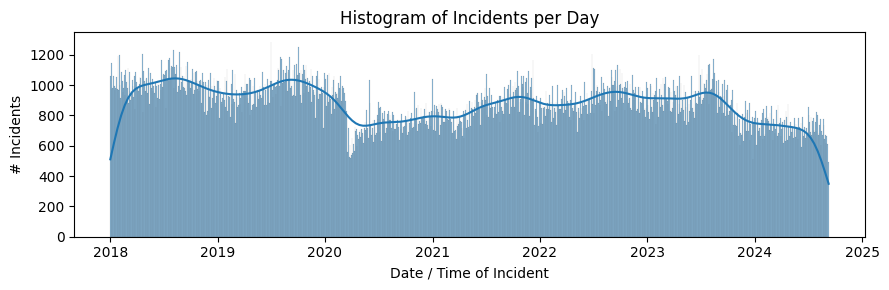

Total of 887,173 incidents from 2018-01-01 00:00:00 to 2024-09-08 00:00:00


In [35]:
plt.figure(figsize=(graph_utils.page_width, 3))
sns.histplot(data=current_clean_df, x=current_clean_df.index, bins=1000, kde=True)
# sns.histplot(data=current_clean_df, x=current_clean_df.index, discrete=True, kde=True)

plt.xlabel('Date / Time of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day')

plt.tight_layout()
plt.savefig('../images/incidents_per_day.png')
plt.show()

print(f'Total of {current_clean_df.shape[0]:,d} incidents from {current_clean_df.date.min()} to {current_clean_df.date.max()}')

#### Inspect: Incidents per Year

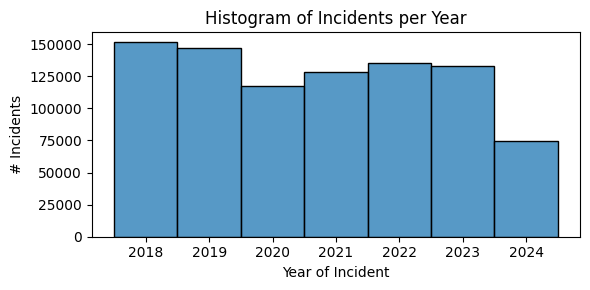

In [37]:
plt.figure(figsize=(6, 3))
# sns.histplot(data=current_clean_df, x='incident_year', kde=True)
sns.histplot(data=current_clean_df, x='incident_year', discrete=True)

plt.xlabel('Year of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Year')

plt.tight_layout()
plt.savefig('../images/incidents_per_year.png')
plt.show()

#### Inspect: Incidents by Day of Week

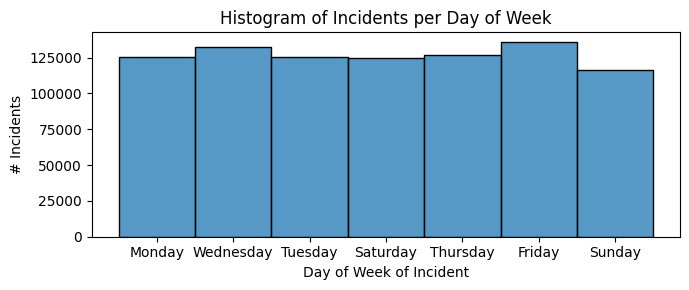

In [39]:
plt.figure(figsize=(7, 3))
# sns.histplot(data=current_clean_df, x='incident_year', kde=True)
sns.histplot(data=current_clean_df, x='incident_day_of_week')#, discreet=False)

plt.xlabel('Day of Week of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day of Week')

plt.tight_layout()
plt.savefig('../images/incidents_per_DoW.png')
plt.show()

In [40]:
current_clean_df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'police_district', 'analysis_neighborhood', 'latitude', 'longitude',
       'neighborhoods', 'current_police_districts', 'date'],
      dtype='object')

#### Inspect: Incident-Specific Features

Let's look at Incident-specific features that are left for a specific Incident to understand how the data is reported:
  * incident_datetime
  * report_datetime
  * row_id
  * incident_id / incident_code
  * incident_number
  * cad_number
  * incident_category
  * incident_subcategory
  * incident_description
  * resolution

Is there an interesting incident to look at with a lot of rows?

In [43]:
inc_id = current_clean_df[current_clean_df.incident_id.duplicated()].incident_id.value_counts().index[0]

In [44]:
current_raw_df.query('incident_id == @inc_id')[['incident_datetime', 'report_datetime', 'incident_id', 'incident_code', 
                                                'row_id', 'incident_number', 'cad_number',
                                                'incident_category','incident_subcategory', 'incident_description', 
                                                'resolution']]

,incident_datetime,report_datetime,incident_id,incident_code,row_id,incident_number,cad_number,incident_category,incident_subcategory,incident_description,resolution
datetime,,,,,,,,,,,
2019-02-07 19:57:00,2019/02/07 07:57:00 PM,2019/02/07 07:57:00 PM,767718,7027,76771807027,190086560,190383501.0,Motor Vehicle Theft?,Motor Vehicle Theft,"Auto, Grand Theft of",Cite or Arrest Adult
2019-02-07 19:57:00,2019/02/07 07:57:00 PM,2019/02/07 07:57:00 PM,767718,27130,76771827130,190086560,190383501.0,Other Miscellaneous,Other,"Burglary Tools, Possession Of",Cite or Arrest Adult
2019-02-07 19:57:00,2019/02/07 07:57:00 PM,2019/02/07 07:57:00 PM,767718,7041,76771807041,190086560,190383501.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Cite or Arrest Adult
2019-02-07 19:57:00,2019/02/07 07:57:00 PM,2019/02/07 07:57:00 PM,767718,16652,76771816652,190086560,190383501.0,Drug Offense,Drug Violation,"Methamphetamine, Possession For Sale",Cite or Arrest Adult


The single incident, multiple rows explanation is as follows (from the [DataSF Dataset Explainer](https://sfdigitalservices.gitbook.io/dataset-explainers/sfpd-incident-report-2018-to-present#multiple-incident-codes)):

>Incident reports can have one or more associated Incident Codes. For example, an officer may have a warrant for an
>arrest and while making the arrest, discovers narcotics in the individual’s possession. The officer would record
>two Incident Codes: (1) for the warrant and (2) for the discovery of narcotics.
>
>When multiple Incident Codes exist, the Incident ID, Incident Number and CAD Numbers remain the same and the
>Row ID field can be used as a unique identifier for each row of data. An example is provided below.

Since we are interested in predicting the `incident_category` based on time and location, we'll retain  all three rows, each with a different category, but remove the columns that merge them into a single incident. This gives us more training data with a whetted outcome, i.e. target variable.

So we will drop the following columns:

  * incident_datetime / report_datetime
  * incident_id / incident_code / row_id / incident_number / cad_number
  * incident_subcategory
  * incident_description

and only retain `incident_category` as our target variable - we will look at `resolution` separately.

In [46]:
drop_cols_incident = ['incident_datetime', 'report_datetime', 
                      'incident_id', 'incident_code', 'row_id', 'incident_number', 'cad_number',
                      'incident_subcategory', 'incident_description'
                     ]

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_incident)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column incident_datetime dropped
... preprocess_drop_cols: Column report_datetime dropped
... preprocess_drop_cols: Column incident_id dropped
... preprocess_drop_cols: Column incident_code dropped
... preprocess_drop_cols: Column row_id dropped
... preprocess_drop_cols: Column incident_number dropped
... preprocess_drop_cols: Column cad_number dropped
... preprocess_drop_cols: Column incident_subcategory dropped
... preprocess_drop_cols: Column incident_description dropped
... Done


#### Inspect: Resolution

In [48]:
current_clean_df.resolution.value_counts()

resolution
Open or Active          711960
Cite or Arrest Adult    168330
Unfounded                 4442
Exceptional Adult         2441
Name: count, dtype: int64

Both the `Unfounded` and `Exceptional Adult` resolution types will dismiss the case so we can remove these rows.

In [50]:
current_clean_df = current_clean_df.query('resolution != "Unfounded" and resolution != "Exceptional Adult"')

In [51]:
current_clean_df.resolution.value_counts()

resolution
Open or Active          711960
Cite or Arrest Adult    168330
Name: count, dtype: int64

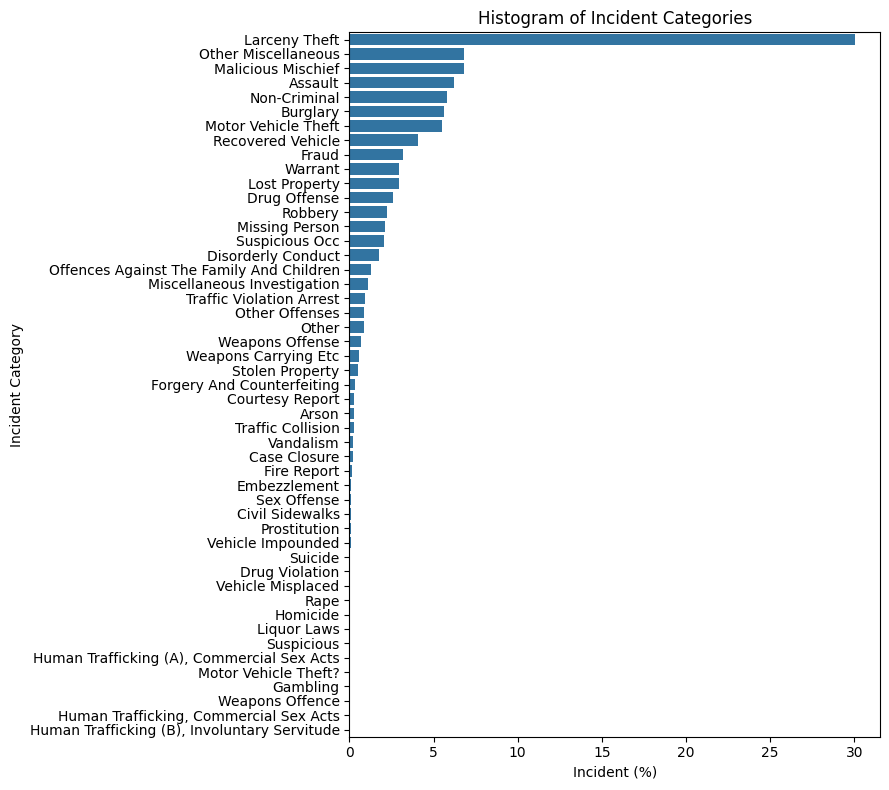

Total of 49 categories


In [52]:
plt.figure(figsize=(graph_utils.page_width, 8))

cats = current_clean_df.incident_category.value_counts()
sns.barplot(cats.transform(lambda x: (x / cats.values.sum()) * 100), 
            orient='h')


plt.xlabel('Incident (%)')
plt.ylabel('Incident Category')
plt.title('Histogram of Incident Categories')

plt.tight_layout()
plt.savefig('../images/incidents_per_day.png')
plt.show()

print(f'Total of {cats.shape[0]:,d} categories')

In [53]:
# graph_utils.graph_features(current_clean_df, 13, 2, figsize=(10, 15))

#### Inspect: Police Districts

In [55]:
current_clean_df.police_district.value_counts()

police_district
Central       129584
Northern      119148
Mission       109512
Southern      103912
Tenderloin     87725
Bayview        78179
Ingleside      68176
Taraval        62683
Richmond       54399
Park           39712
Out of SF      27260
Name: count, dtype: int64

In [56]:
current_clean_df.current_police_districts.value_counts()

current_police_districts
6.0     123640
4.0     119013
3.0     107659
1.0     103946
5.0      82377
2.0      78670
9.0      66111
10.0     64304
8.0      47620
7.0      37315
Name: count, dtype: int64

We can safely drop the `current_police_districts` column as it's not very useful, we can use `police_district` 
as a categorical feature instead. However, we need to remove the incidents that are `Out of SF`.

In [58]:
current_clean_df = current_clean_df.query('police_district != "Out of SF"')

In [59]:
current_clean_df.police_district.value_counts()

police_district
Central       129584
Northern      119148
Mission       109512
Southern      103912
Tenderloin     87725
Bayview        78179
Ingleside      68176
Taraval        62683
Richmond       54399
Park           39712
Name: count, dtype: int64

In [60]:
drop_cols_pd = ['current_police_districts']

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_pd)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column current_police_districts dropped
... Done


In [61]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_date            100.00
incident_time            100.00
incident_year            100.00
incident_day_of_week     100.00
incident_category         99.90
resolution               100.00
police_district          100.00
analysis_neighborhood     96.51
latitude                  96.53
longitude                 96.53
neighborhoods             94.60
date                     100.00
dtype: float64

#### Drop Nulls

We have now gotten rid of most of the unwanted data and most of the columns have above 94% non-null data. This is sufficient data for training, so we will drop all null rows for now:

In [64]:
current_clean_df.dropna(inplace=True)

In [65]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_date            100.0
incident_time            100.0
incident_year            100.0
incident_day_of_week     100.0
incident_category        100.0
resolution               100.0
police_district          100.0
analysis_neighborhood    100.0
latitude                 100.0
longitude                100.0
neighborhoods            100.0
date                     100.0
dtype: float64

In [66]:
current_clean_df.head(2)

,incident_date,incident_time,incident_year,incident_day_of_week,incident_category,resolution,police_district,analysis_neighborhood,latitude,longitude,neighborhoods,date
datetime,,,,,,,,,,,,
2022-06-27 12:00:00,2022/06/27,12:00,2022,Monday,Lost Property,Open or Active,Central,Financial District/South Beach,37.787359,-122.408227,19.0,2022-06-27
2023-03-16 17:30:00,2023/03/16,17:30,2023,Thursday,Assault,Open or Active,Bayview,Potrero Hill,37.762290,-122.401324,54.0,2023-03-16


## Cross-check Preprocessing

Read in the preprocessed data from utility function and validate against the currently _cleaned_ data 
as part of the data investigation

In [69]:
temp = data_utils.preprocess_data(current_raw_df.copy())

crosscheck = 'PASSED' if (temp.shape[0] == current_clean_df.shape[0]
                          and temp.shape[1] == current_clean_df.shape[1]) else 'FAILED'
print('\n\nCROSSCHECK {}: raw: {}, pre-processed: {}, cleaned: {}\n\n'
      .format(crosscheck, current_raw_df.shape, temp.shape, current_clean_df.shape))

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

/Users/fazeel/Google Drive/Classroom/UCB-PCMLAI/repos/UCB_ML_AI_Capstone/notebooks/../src/data_utils.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


We're ready for modeling now!